In [1]:
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
def cm2inch(value):
    return value/2.54

#axes.xaxis.set_tick_params(direction='in', which='both')
#axes.yaxis.set_tick_params(direction='in', which='both')



mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 0.5
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize=11)
rc('ytick', labelsize=11)
def cm2inch(value):
    return value/2.54
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
def pdf(data, bins = 10, density = True):
    
    pdf, bins_edge = np.histogram(data, bins = bins, density = density)
    bins_center = (bins_edge[0:-1] + bins_edge[1:]) / 2
    
    return pdf, bins_center 

In [2]:
#stop

n_r = np.fromfile("find_nrfit_result_dur_27052020_n_r_fix_0p0513_wav_532.dat")
n_r = n_r.reshape(len(n_r)//10,10)
r = n_r[:,3]
n = n_r[:,4]

In [3]:
H, xedges, yedges = np.histogram2d(n, r, bins=100)
H = H.T  # Let each row list bins with common y range.

Text(0.5, 0, 'r [$\\mathrm{\\mu m}$]')

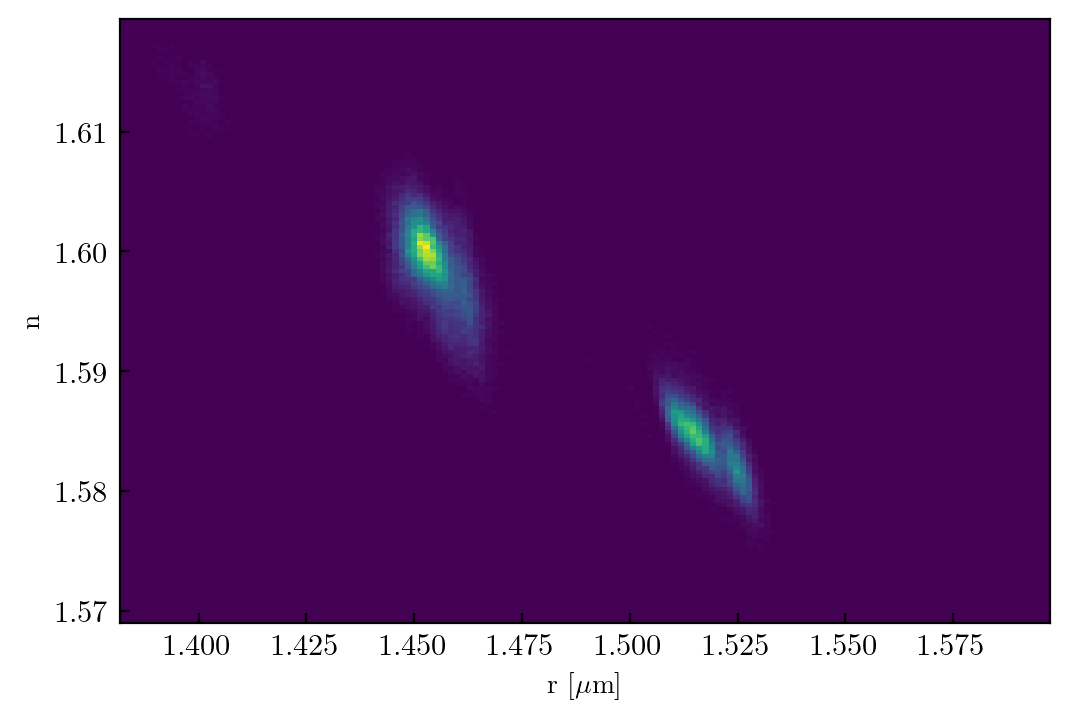

In [4]:
plt.hist2d(r,n, bins = 150)
plt.ylabel("n")
plt.xlabel("r [$\mathrm{\mu m}$]")

Text(0.5, 0, 'r [$\\mathrm{\\mu m}$]')

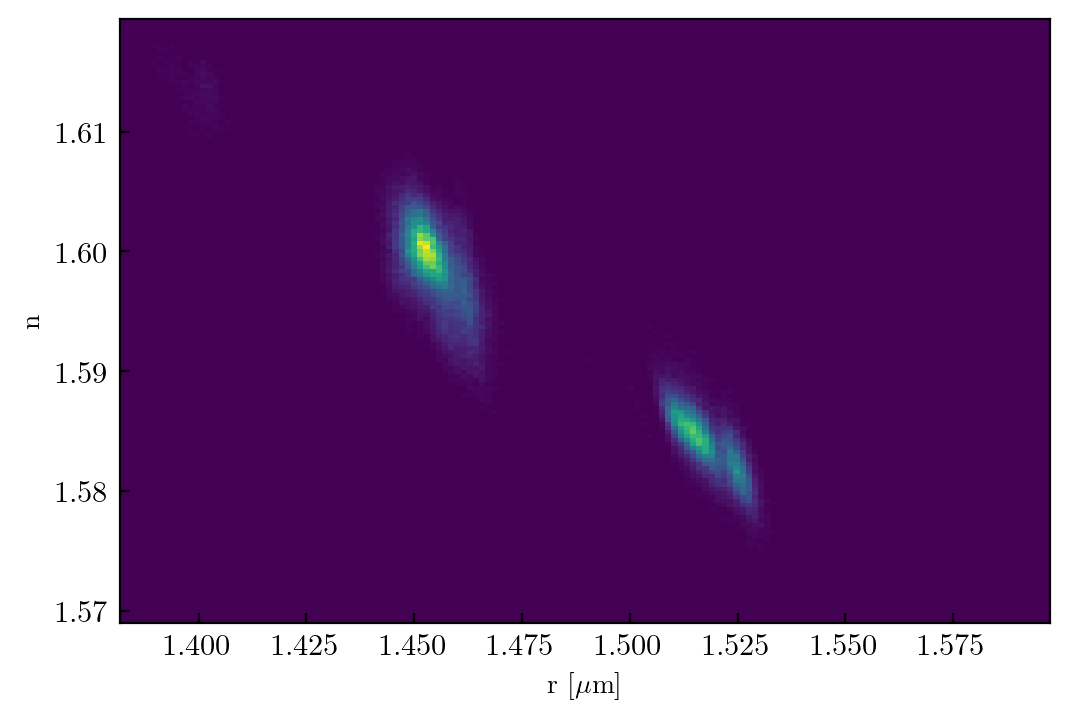

In [5]:
plt.hist2d(r,n, bins = 150)
plt.ylabel("n")
plt.xlabel("r [$\mathrm{\mu m}$]")

In [6]:
import numpy as np
import scipy.stats as st
import matplotlib.ticker as ticker

data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
x = r[(r>1.5) & (r<1.555)]
y = n[(r>1.5) & (r<1.555)]
xmin, xmax = np.min(x), np.max(x)
ymin, ymax = np.min(y), np.max(y)

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
f = f/np.max(f)



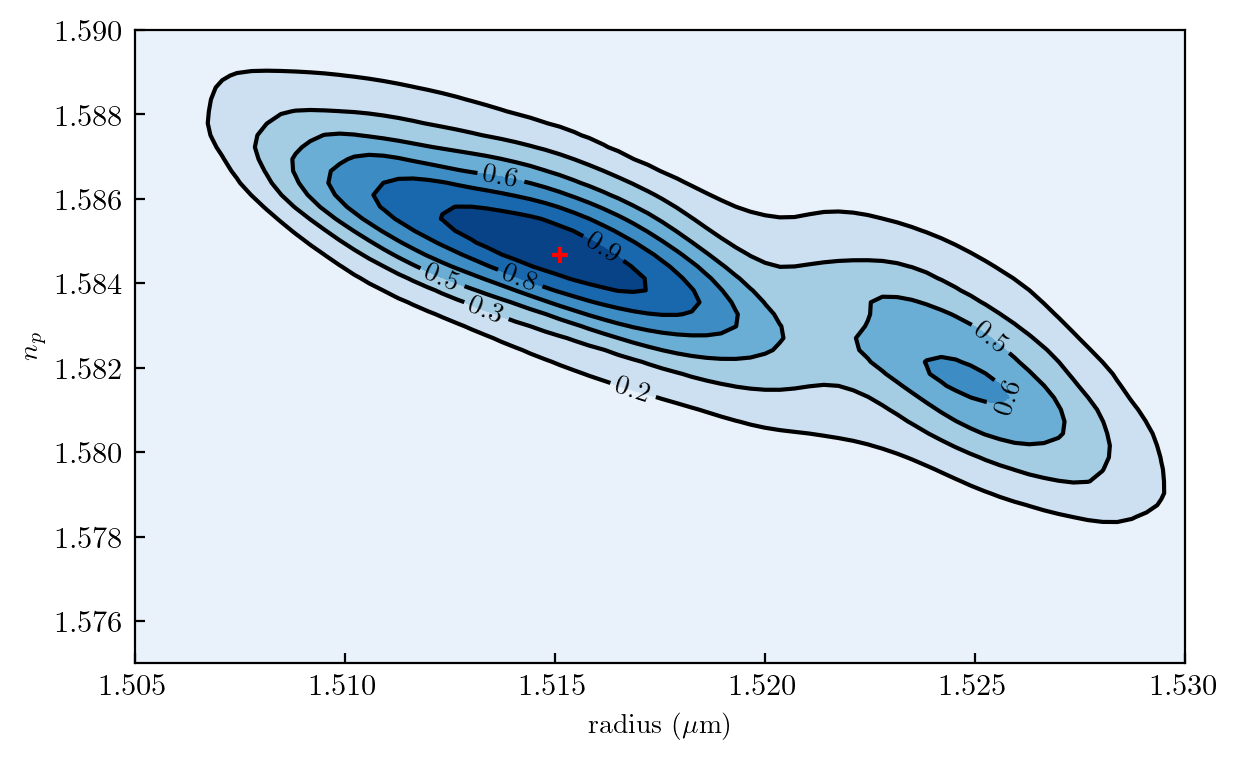

In [7]:
fig = plt.figure()
fig.subplots_adjust(left=0.16, bottom=.20, right=.99, top=.99)
ax = fig.gca()
ax.set_xlim(1.505, 1.53)
ax.set_ylim(1.575, 1.59)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k', levels=6)
# Label plot
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.3f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.3f'))
ax.clabel(cset, inline=1, fontsize=10, fmt="%1.1f")
plt.scatter(xx[np.where(f == 1)],yy[np.where(f == 1)], color = "red", marker="+")
ax.set_xlabel("radius ($\mathrm{\mu m}$)")
ax.set_ylabel("$n_p$")
#plt.title("KDE r n")
fig.set_size_inches(cm2inch(16), cm2inch(9.9))

plt.tight_layout()
fig.savefig('KDErn.pdf')
#pl.show()

In [8]:
print(" n determined with : mu={0}, sigma={1}".format(np.mean(yy[np.where(f > 0.1)]), np.std(yy[np.where(f > 0.1)])))
print(" r determined with : mu={0}, sigma={1}".format(np.mean(xx[np.where(f > 0.1)]), np.std(xx[np.where(f > 0.1)])))


 n determined with : mu=1.5838835572314136, sigma=0.0027026010318722507
 r determined with : mu=1.5183775193009386, sigma=0.006251775306740432
